# Clustering Donor Behavior in Nonprofit Transactions

Project Overview

This project aims to analyze transactional donation data to uncover meaningful insights about donor behavior through segmentation. Using the K-means clustering algorithm, the project identifies distinct donor groups based on donation patterns, frequency, and other relevant behavioral metrics. These insights enable nonprofits to:
1.  **Understand Donor Behavior:** Gain deeper knowledge of donor preferences, habits, and trends.
2.	**Tailor Engagement Strategies:** Develop personalized marketing campaigns and communication plans that resonate with specific donor segments.
3.	**Improve Donor Retention:** Identify at-risk donors and create strategies to re-engage them effectively.
4.	**Optimize Fundraising Efforts:** Allocate resources strategically to maximize the impact of fundraising activities.
5.	**Enhance Long-Term Relationships:** Build stronger connections with donors by aligning with their interests and values.

The project incorporates data preprocessing, exploratory data analysis (EDA), and visualizations to ensure robust data preparation and intuitive understanding of patterns. Advanced clustering techniques are applied to segment donors based on key attributes such as:
-	Donation frequency
-	Donation amount
-	Recency of donations
-	Campaign-specific behaviors

In addition to the analytical focus, the project evaluates the quality of clustering using metrics like elbow, silhouette scores and inertia to ensure meaningful and actionable groupings.


## Objectives
- To explore donation patterns and donor behavior.
- To apply K-means clustering for segmenting donors based on their recency, frequency, and monetary value.
- To provide actionable insights for nonprofit organizations to enhance their fundraising strategies.

## Dataset
- **Source:** This dataset is derived from real transactional donation data but has been transformed into synthetic data and anonymized to ensure privacy. Real data points have been combined with generated fake data to protect sensitive information while maintaining realistic patterns for analysis. Also, the data has been previusly prepared for analysis use.
- **Fields:**
  - `donor_id`: A unique identifier for each donor. This field helps to track individual donors across multiple donations.
  - `donation_date`: The date when the donation was made. Useful for analyzing donation trends over time.
  - `payment_type`: The method used for the donation (e.g., Credit Card, Cash). Useful for understanding payment preferences among donors.
  - `donation`: The amount donated by the donor in a specific transaction. Important for tracking the financial contribution of each donor.
  - `campaign`: The specific fundraising campaign associated with the donation. Useful for analyzing which campaigns are most effective or popular.
  - **Engineered Fields:**
    - `recency`: Days since the last donation by donor.
    - `frequency`: Number of donations in a specific period by donor.
    - `total_donations`: Total donation amount by donor.

## Technologies Used
- **Programming Language:** Python
- **Libraries:**
  - Data Manipulation: Pandas, NumPy
  - Data Visualization: Matplotlib, Seaborn
  - Machine Learning: Scikit-learn
- **Development Environment:** Jupyter Notebook

## Steps Followed
1. **Data Preprocessing:**
   - Cleaned the dataset by handling missing values and outliers.
   - Normalized features for clustering.
2. **Exploratory Data Analysis (EDA):**
   - Visualized donation trends, recency, frequency, and monetary distributions.
3. **Feature Engineering:**
   - Created features like Recency, Frequency, and Monetary Value for clustering.
4. **K-means Clustering:**
   - Determined the optimal number of clusters using the Elbow method.
   - Segmented donors into distinct clusters.
5. **Cluster Analysis:**
   - Interpreted each cluster and its characteristics.
6. **Recommendations:**
   - Suggested personalized strategies for donor engagement based on cluster insights.

## Key Insights
- Donors were segmented into [e.g., "high-value donors," "frequent donors," "low-engagement donors"].
- Strategies for engagement vary significantly between clusters, enabling nonprofits to allocate resources more effectively.


### Importing libraries

| Library/Module      | Purpose                                      |
|---------------------|----------------------------------------------|
| `pandas`            | Data manipulation and analysis.             |
| `numpy`             | Numerical computations.                     |
| `random`            | Random number generation.                   |
| `string`            | String manipulation tools.                  |
| `matplotlib.pyplot` | Data visualization.                         |
| `seaborn`           | Statistical graphics.                       |
| `scipy.stats`       | Statistical functions and probability.      |
| `sklearn.cluster`   | Machine learning (K-Means clustering).      |
| `sklearn.preprocessing` | Scaling and transforming data.          |
| `sklearn.metrics`   | Performance evaluation.                     |
| `sklearn_extensions`| Additional tools for Scikit-learn.          |

In [1]:
!pip install sklearn_extensions
#!pip install sklearn.datasets.samples_generator

In [ ]:
## Importing libraries for data Extraction and Transformations Analysis
import pandas as pd
import numpy as np
import random
import string

import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler, RobustScaler, StandardScaler
import sklearn_extensions as ske
from sklearn.metrics import silhouette_score
from scipy.stats import linregress



## Reading the data

In [3]:
df_donations = pd.read_excel('../data/donations.xlsx')
df_donations.head(5)

,donor_id,donation_date,payment_type,donation,campaing
0,007dummyid1337,01-07-2018,Credit Card,25,camp-Regular
1,007dummyid1569,15-12-2019,Credit Card,50,camp-Regular
2,007dummyid0190,15-12-2023,Credit Card,10,camp-Regular
3,007dummyid0763,01-01-2021,Credit Card,10,camp-Regular
4,007dummyid1964,25-11-2020,Cash,10,camp-2020-Christmas- Request


In [4]:

df_donations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63614 entries, 0 to 63613
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   donor_id       63614 non-null  object
 1   donation_date  63614 non-null  object
 2   payment_type   60411 non-null  object
 3   donation       63614 non-null  int64 
 4   campaing       63614 non-null  object
dtypes: int64(1), object(4)
memory usage: 2.4+ MB


### Converting data types

In [5]:
df_donations['donor_id'] = df_donations['donor_id'].astype('str')  # Convert to string
df_donations['donation_date'] = pd.to_datetime(df_donations['donation_date'], format="%d-%m-%Y")  # Convert to date
df_donations['payment_type'] =  df_donations['payment_type'].astype('str')   # Convert to str
df_donations['donation'] =  df_donations['donation'].astype('float')   # Convert to float
df_donations['campaing'] =  df_donations['campaing'].astype('str')   # Convert to str

df_donations.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63614 entries, 0 to 63613
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   donor_id       63614 non-null  object        
 1   donation_date  63614 non-null  datetime64[ns]
 2   payment_type   63614 non-null  object        
 3   donation       63614 non-null  float64       
 4   campaing       63614 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 2.4+ MB


In [6]:
# Count nulls or NaN values for each column
null_counts = df_donations.isnull().sum()
print(null_counts)

donor_id         0
donation_date    0
payment_type     0
donation         0
campaing         0
dtype: int64


## EDA Exploratory Data Analysis

Initial observations of the dataset focus on analyzing the features to identify potential outliers and understand the overall data distribution across the entire dataset

In [7]:
df_donations.describe()

,donation_date,donation
count,63614,63614.000000
mean,2021-11-02 00:51:01.363850752,160.323907
min,2018-07-01 00:00:00,0.000000
25%,2020-06-15 00:00:00,20.000000
50%,2021-11-10 00:00:00,35.000000
75%,2023-04-15 00:00:00,55.000000
max,2024-10-25 00:00:00,770000.000000
std,NaN,4490.549365


The donation feature contains 63,614 recorded transactions, with an average donation amount of $160.32. However, the median donation is $35.00, indicating a positive skew in the data caused by a few exceptionally large contributions, such as the maximum donation of $770,000. Most donations fall within the range of $20.00 (25th percentile) to $55.00 (75th percentile), showing that smaller contributions dominate the dataset. The high standard deviation of $4,490.55 further highlights the variability in donation amounts due to significant outliers. These outliers should be has a diferently process to ensure they do not disproportionately affect analytical results, such as clustering or segmentation analyses.

Due that the distribution of the donations has high dispersion, here we are going to try to create bins for the donations amounts

In [9]:
#df_donations = df_donations.drop(columns=['gift_type'])

def determine_gift_type(amount):
    if amount <= 50:  # Captures donations more evenly distributed
        return "Small Gift (Under $50)"
    elif amount <= 1000:
        return "Major Gift ($50-$1K)"
    elif amount <= 10000:
        return "Premium Gift ($1K-$10K)"
    elif amount <= 100000:
        return "High-Value Gift ($10K-$100K)"
    elif amount <= 1000000:
        return "Elite Gift ($100K-$1M)"
    else:
        return "Ultra Gift (Over $1M)"

# Apply the function to create the Gift Type column
df_donations['gift_type'] = df_donations['donation'].apply(determine_gift_type)

df_donations

,donor_id,donation_date,payment_type,donation,campaing,gift_type
0,007dummyid1337,2018-07-01,Credit Card,25.0,camp-Regular,Small Gift (Under $50)
1,007dummyid1569,2019-12-15,Credit Card,50.0,camp-Regular,Small Gift (Under $50)
2,007dummyid0190,2023-12-15,Credit Card,10.0,camp-Regular,Small Gift (Under $50)
3,007dummyid0763,2021-01-01,Credit Card,10.0,camp-Regular,Small Gift (Under $50)
4,007dummyid1964,2020-11-25,Cash,10.0,camp-2020-Christmas- Request,Small Gift (Under $50)
...,...,...,...,...,...,...
63609,007dummyid1108,2024-10-24,nan,200.0,camp-2024-Spring- Bulletin,Major Gift ($50-$1K)
63610,007dummyid5077,2024-10-24,nan,20.0,camp-Regular,Small Gift (Under $50)
63611,007dummyid3813,2024-10-23,nan,100.0,camp-2024-Spring- Bulletin,Major Gift ($50-$1K)
63612,007dummyid2467,2024-10-23,nan,25.0,camp-2024-Spring- Bulletin,Small Gift (Under $50)


/var/folders/l0/k640lr2x4_b2yl82b21lnhdm0000gn/T/ipykernel_30469/455178856.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, bins=50, kde=True, fit=norm)


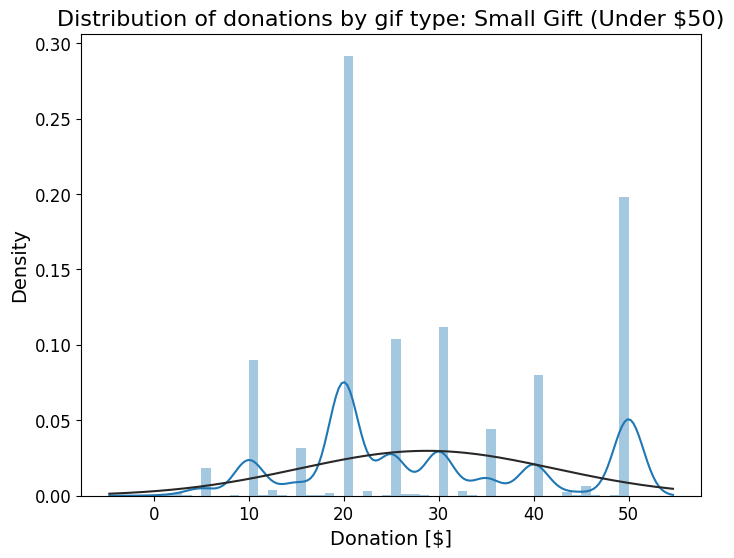

/var/folders/l0/k640lr2x4_b2yl82b21lnhdm0000gn/T/ipykernel_30469/455178856.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, bins=50, kde=True, fit=norm)


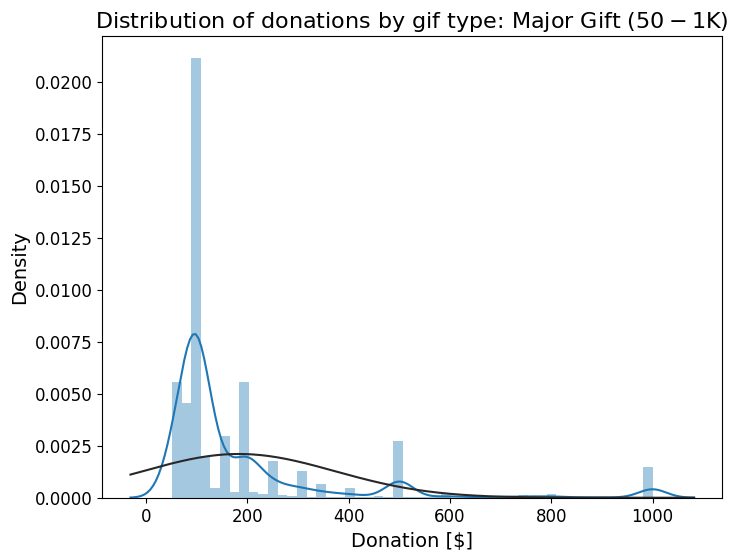

/var/folders/l0/k640lr2x4_b2yl82b21lnhdm0000gn/T/ipykernel_30469/455178856.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, bins=50, kde=True, fit=norm)


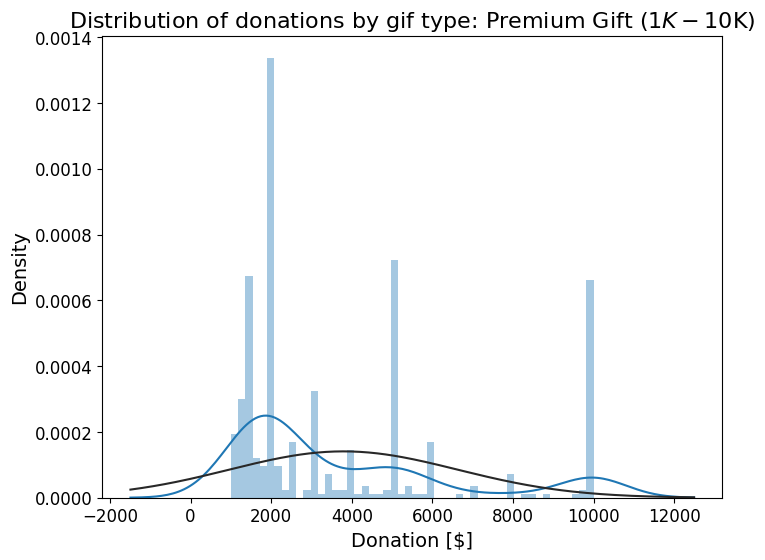

/var/folders/l0/k640lr2x4_b2yl82b21lnhdm0000gn/T/ipykernel_30469/455178856.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, bins=50, kde=True, fit=norm)


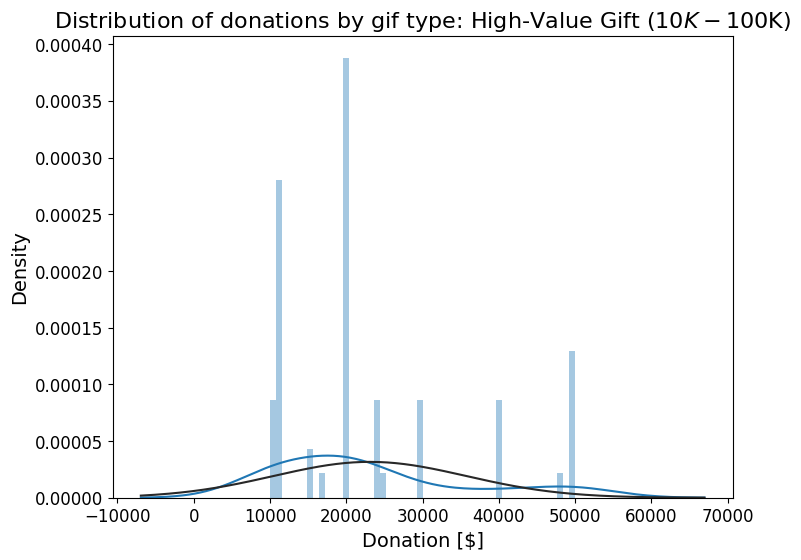

/var/folders/l0/k640lr2x4_b2yl82b21lnhdm0000gn/T/ipykernel_30469/455178856.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, bins=50, kde=True, fit=norm)


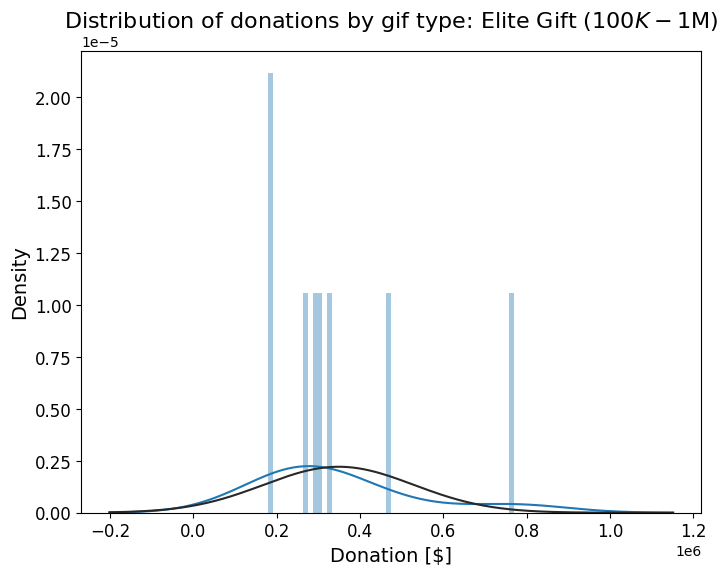

In [10]:
gift_types = df_donations['gift_type'].unique()
gift_types

# Loop to chart amount in bins of types of gifts
for gift in gift_types:
    # Chart the distribution of amounts by bin gifts
    plt.figure(figsize=(8,6))
    df_test = df_donations[(df_donations['gift_type'] == gift)] # | (df_trans_merge['Gift Type'] == 'Major Gift')]
    #df_test=df_trans_merge
    x=df_test['donation']
    sns.distplot(x, bins=50, kde=True, fit=norm)
    plt.title(f'Distribution of donations by gif type: {gift}', fontsize=16)
    plt.xlabel('Donation [$]', fontsize=14)
    plt.xticks(fontsize=12)
    plt.ylabel('Density', fontsize=14)
    plt.yticks(fontsize=12)
    plt.show()


## Featuring Engineering

In [11]:

# Create bins to inspect distribution
bins = [0, 20, 50, 100, 200, 500, 1000, 10000, 100000, 1000000]
bin_labels = ["$0-$20", "$20-$50", "$50-$100", "$100-$200", "$200-$500", "$500-$1K", "$1K-$10K", "$10K-$100K", "$100K-$1M"]
df_donations['bins'] = pd.cut(df_donations['donation'], bins=bins, labels=bin_labels)

# View the frequency distribution
print(df_donations['bins'].value_counts())

bins
$20-$50       26179
$0-$20        20665
$50-$100       9569
$100-$200      3533
$200-$500      2397
$500-$1K        737
$1K-$10K        461
$10K-$100K       58
$100K-$1M         8
Name: count, dtype: int64


In [12]:


# Correct the 'campaign' column name if necessary
df_donations.rename(columns={'campaing': 'campaign'}, inplace=True)

# Ensure 'donor_id' is a column
df_donations.reset_index(drop=True, inplace=True)

# A. Donor Start and End Behavior
# 1. First Donation Amount and Date
first_donation = df_donations.groupby('donor_id').agg(
    first_donation_date=('donation_date', 'min'),
    first_donation_amount=('donation', 'first')
).reset_index()

# 2. Most Recent Donation
last_donation = df_donations.groupby('donor_id').agg(
    last_donation_date=('donation_date', 'max'),
    last_donation_amount=('donation', 'last')
).reset_index()

# 3. Donor Lifespan
donor_lifespan = pd.merge(first_donation[['donor_id', 'first_donation_date']],
                          last_donation[['donor_id', 'last_donation_date']],
                          on='donor_id')
donor_lifespan['donor_lifespan'] = (donor_lifespan['last_donation_date'] - donor_lifespan['first_donation_date']).dt.days

# 4. Total Donations and Frequency
donor_summary = df_donations.groupby('donor_id').agg(
    count_donations=('donation', 'count'),
    sum_donations=('donation', 'sum'),
    avg_donation=('donation', 'mean'),
    std_donation=('donation', 'std'),
    min_donation=('donation', 'min'),
    max_donation=('donation', 'max')
).reset_index()

# 1. Seasonality by Donor (Most Active Month)
df_donations['donation_month'] = df_donations['donation_date'].dt.month

most_active_month = df_donations.groupby('donor_id')['donation_month'].agg(
    lambda x: x.value_counts().idxmax()
).reset_index().rename(columns={'donation_month': 'most_active_month'})

# 2. Binned Donation Analysis
bins = [0, 20, 50, 100, 200, 500, 1000, 10000, 100000, 1000000]
bin_labels = ["$0-$20", "$20-$50", "$50-$100", "$100-$200", "$200-$500", "$500-$1K", "$1K-$10K", "$10K-$100K", "$100K-$1M"]

df_donations['bins'] = pd.cut(df_donations['donation'], bins=bins, labels=bin_labels)

bin_counts = df_donations.groupby(['donor_id', 'bins']).size().unstack(fill_value=0)
bin_counts.columns = [f"count_{label}" for label in bin_counts.columns]
bin_counts = bin_counts.reset_index()

# 3. Bin Transitions
first_bin = df_donations.sort_values(['donor_id', 'donation_date']).groupby('donor_id')['bins'].first().reset_index().rename(columns={'bins': 'first_bin'})
last_bin = df_donations.sort_values(['donor_id', 'donation_date']).groupby('donor_id')['bins'].last().reset_index().rename(columns={'bins': 'last_bin'})

# 6. Frequency of Giving
avg_days_between_donations = df_donations.groupby('donor_id').apply(
    lambda group: group.sort_values('donation_date')['donation_date'].diff().dt.days.mean()
).rename('avg_days_between_donations').reset_index()

# Identify Single-Donation Donors
single_donation_ids = donor_summary[donor_summary['count_donations'] == 1]['donor_id']
avg_days_between_donations.loc[avg_days_between_donations['donor_id'].isin(single_donation_ids), 'avg_days_between_donations'] = np.nan

# Define bins and labels for frequency
freq_bins = [0, 30, 90, 180, 365, 465, np.inf]
freq_labels = ['<30 days', '30-90 days', '90-180 days', '180-365 days', '>365-465 days', '>465 days']

avg_days_between_donations['avg_donation_bin'] = pd.cut(
    avg_days_between_donations['avg_days_between_donations'], bins=freq_bins, labels=freq_labels, right=False
)

# Assign 'Single Donation' category
avg_days_between_donations['avg_donation_bin'] = avg_days_between_donations['avg_donation_bin'].astype(object)
avg_days_between_donations.loc[avg_days_between_donations['avg_days_between_donations'].isna(), 'avg_donation_bin'] = 'Single Donation'

# 7. Donation Recency
today = df_donations['donation_date'].max()
donation_recency = last_donation.copy()
donation_recency['recency'] = (today - donation_recency['last_donation_date']).dt.days
donation_recency = donation_recency[['donor_id', 'recency']]

# 8. Consistency of Giving
donation_variation = df_donations.groupby('donor_id')['donation'].apply(
    lambda x: x.std() / x.mean() if x.mean() > 0 else np.nan
).rename('consistency').reset_index()

# 9. Trend of Donations Over Time
def calculate_trend(group):
    if len(group) > 1:
        group = group.sort_values('donation_date')
        dates_ordinal = group['donation_date'].map(pd.Timestamp.toordinal)
        if len(set(dates_ordinal)) == 1:
            return np.nan
        slope, _, _, _, _ = linregress(dates_ordinal, group['donation'])
        return slope
    return np.nan

donation_trends = df_donations.groupby('donor_id').apply(calculate_trend).rename('donation_trend').reset_index()

# 10. Growth in Donation Size
donation_growth = pd.merge(first_donation[['donor_id', 'first_donation_amount']],
                           last_donation[['donor_id', 'last_donation_amount']], on='donor_id')
donation_growth['donation_growth'] = donation_growth['last_donation_amount'] / donation_growth['first_donation_amount']
donation_growth = donation_growth[['donor_id', 'donation_growth']]

# C. Campaign Analysis
# 11. Campaign Variety
campaign_variety = df_donations.groupby('donor_id')['campaign'].nunique().rename('unique_campaigns').reset_index()

# 12. Favorite Campaign
favorite_campaign = df_donations.groupby('donor_id')['campaign'].agg(lambda x: x.value_counts().idxmax()).rename('favorite_campaign').reset_index()

# 13. Percentage of Major Campaign Donations (e.g., Campaign X)
campaign_x_pct = df_donations.groupby('donor_id').apply(
    lambda group: (group['campaign'] == 'Campaign X').mean()
).rename('campaign_x_pct').reset_index()

# 14. Yearly Donations
df_donations['donation_year'] = df_donations['donation_date'].dt.year
yearly_donations = df_donations.groupby(['donor_id', 'donation_year']).agg(
    yearly_donation_sum=('donation', 'sum')
).reset_index()
yearly_donations_pivot = yearly_donations.pivot(
    index='donor_id', columns='donation_year', values='yearly_donation_sum'
).fillna(0).reset_index()
yearly_donations_pivot.columns = ['donor_id'] + [f"yearly_donation_{col}" for col in yearly_donations_pivot.columns if col != 'donor_id']

# E. Major Gift Timing
# 16. Time to Major Gift (> $1,000)
first_major_gift_date = df_donations[df_donations['donation'] > 1000].groupby('donor_id')['donation_date'].min().reset_index()
time_to_major_gift = pd.merge(first_major_gift_date, first_donation[['donor_id', 'first_donation_date']], on='donor_id', how='left')
time_to_major_gift['time_to_major_gift'] = (time_to_major_gift['donation_date'] - time_to_major_gift['first_donation_date']).dt.days
time_to_major_gift = time_to_major_gift[['donor_id', 'time_to_major_gift']]

# Merge all DataFrames
dataframes_to_merge = [last_donation, donor_summary, most_active_month, bin_counts,
                       first_bin, last_bin, avg_days_between_donations, donation_recency,
                       donation_variation, donation_trends, donation_growth, campaign_variety,
                       favorite_campaign, campaign_x_pct, time_to_major_gift, yearly_donations_pivot]

donor_features = first_donation.copy()

for df in dataframes_to_merge:
    donor_features = pd.merge(donor_features, df, on='donor_id', how='left')

# Handle Missing Values
donor_features.fillna({
    'avg_days_between_donations': -1,
    'donation_growth': 0,
    'donation_variation': 0,
    'time_to_major_gift': -1,
    # Add other fields as necessary
}, inplace=True)

# Save or display the result
donor_features.to_csv("donor_features.csv", index=False)
print(donor_features.head())

/var/folders/l0/k640lr2x4_b2yl82b21lnhdm0000gn/T/ipykernel_30469/1891113429.py:49: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_counts = df_donations.groupby(['donor_id', 'bins']).size().unstack(fill_value=0)
/var/folders/l0/k640lr2x4_b2yl82b21lnhdm0000gn/T/ipykernel_30469/1891113429.py:58: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  avg_days_between_donations = df_donations.groupby('donor_id').apply(
/var/folders/l0/k640lr2x4_b2yl82b21lnhdm0000gn/T/ipykernel_30469/1891113429.py:100: DeprecationWarnin

         donor_id first_donation_date  first_donation_amount  \
0  007dummyid0001          2019-02-15                   30.0   
1  007dummyid0002          2018-09-24                  200.0   
2  007dummyid0003          2018-12-05                  600.0   
3  007dummyid0004          2018-08-10                   50.0   
4  007dummyid0005          2019-03-04                  500.0   

  last_donation_date  last_donation_amount  count_donations  sum_donations  \
0         2024-10-17                  30.0               77         3770.0   
1         2024-08-27                 500.0               17         3950.0   
2         2024-03-23                 750.0               12         7500.0   
3         2024-09-25                 200.0               29         4060.0   
4         2024-10-03                 100.0               64        10550.0   

   avg_donation  std_donation  min_donation  ...  \
0     48.961039     69.539546          30.0  ...   
1    232.352941    108.888097         100.

In [14]:
donor_features.columns


Index(['donor_id', 'first_donation_date', 'first_donation_amount',
       'last_donation_date', 'last_donation_amount', 'count_donations',
       'sum_donations', 'avg_donation', 'std_donation', 'min_donation',
       'max_donation', 'most_active_month', 'count_$0-$20', 'count_$20-$50',
       'count_$50-$100', 'count_$100-$200', 'count_$200-$500',
       'count_$500-$1K', 'count_$1K-$10K', 'count_$10K-$100K',
       'count_$100K-$1M', 'first_bin', 'last_bin',
       'avg_days_between_donations', 'avg_donation_bin', 'recency',
       'consistency', 'donation_trend', 'donation_growth', 'unique_campaigns',
       'favorite_campaign', 'campaign_x_pct', 'time_to_major_gift',
       'yearly_donation_2018', 'yearly_donation_2019', 'yearly_donation_2020',
       'yearly_donation_2021', 'yearly_donation_2022', 'yearly_donation_2023',
       'yearly_donation_2024'],
      dtype='object')

## Featuring created

The following features are derived from the fields available in the dataset. While not all of them will be used in the cluster analysis, they have been retained to allow for deeper exploration and to uncover additional relevant insights in the future.

| **No.** | **Field Name**                  | **Description**                                                                                                        |
|---------|---------------------------------|------------------------------------------------------------------------------------------------------------------------|
| 1       | **donor_id**                    | Unique identifier for each donor.                                                                                      |
| 2       | **first_donation_date**         | The date of the donor's first donation.                                                                                |
| 3       | **first_donation_amount**       | The amount of the donor's first donation.                                                                              |
| 4       | **last_donation_date**          | The date of the donor's most recent (last) donation.                                                                   |
| 5       | **last_donation_amount**        | The amount of the donor's most recent (last) donation.                                                                 |
| 6       | **count_donations**             | Total number of donations made by the donor.                                                                           |
| 7       | **sum_donations**               | Total sum of all donations made by the donor.                                                                          |
| 8       | **avg_donation**                | Average donation amount made by the donor.                                                                             |
| 9       | **std_donation**                | Standard deviation of the donor's donation amounts.                                                                    |
| 10      | **min_donation**                | Minimum donation amount made by the donor.                                                                             |
| 11      | **max_donation**                | Maximum donation amount made by the donor.                                                                             |
| 12      | **most_active_month**           | The month (1-12) during which the donor made the most donations.                                                       |
| 13      | **count_$0-$20**                | Number of donations made by the donor in the $0 - $20 range.                                                           |
| 14      | **count_$20-$50**               | Number of donations made by the donor in the $20 - $50 range.                                                          |
| 15      | **count_$50-$100**              | Number of donations made by the donor in the $50 - $100 range.                                                         |
| 16      | **count_$100-$200**             | Number of donations made by the donor in the $100 - $200 range.                                                        |
| 17      | **count_$200-$500**             | Number of donations made by the donor in the $200 - $500 range.                                                        |
| 18      | **count_$500-$1K**              | Number of donations made by the donor in the $500 - $1,000 range.                                                      |
| 19      | **count_$1K-$10K**              | Number of donations made by the donor in the $1,000 - $10,000 range.                                                   |
| 20      | **count_$10K-$100K**            | Number of donations made by the donor in the $10,000 - $100,000 range.                                                 |
| 21      | **count_$100K-$1M**             | Number of donations made by the donor in the $100,000 - $1,000,000 range.                                              |
| 22      | **first_bin**                   | Donation bin category of the donor's first donation amount.                                                            |
| 23      | **last_bin**                    | Donation bin category of the donor's last donation amount.                                                             |
| 24      | **avg_days_between_donations**  | Average number of days between the donor's donations.                                                                  |
| 25      | **avg_donation_bin**            | Categorization based on average days between donations (e.g., '<30 days', 'Single Donation').                          |
| 26      | **recency**                     | Number of days since the donor's last donation up to the most recent date in the dataset.                              |
| 27      | **consistency**                 | Coefficient of variation (standard deviation divided by mean) of the donor's donation amounts, indicating consistency. |
| 28      | **donation_trend**              | Slope of the trend line fitted to the donor's donation amounts over time, indicating increase or decrease in amounts.  |
| 29      | **donation_growth**             | Ratio of the last donation amount to the first donation amount for the donor.                                          |
| 30      | **unique_campaigns**            | Number of unique campaigns the donor has contributed to.                                                               |
| 31      | **favorite_campaign**           | The campaign to which the donor has donated the most frequently.                                                       |
| 32      | **campaign_x_pct**              | Percentage of the donor's donations that were made to 'Campaign X'.                                                    |
| 33      | **time_to_major_gift**          | Number of days from the donor's first donation to their first major gift (donations over $1,000).                      |
| 34      | **yearly_donation_2018**        | Total donation amount made by the donor in the year 2018.                                                              |
| 35      | **yearly_donation_2019**        | Total donation amount made by the donor in the year 2019.                                                              |
| 36      | **yearly_donation_2020**        | Total donation amount made by the donor in the year 2020.                                                              |
| 37      | **yearly_donation_2021**        | Total donation amount made by the donor in the year 2021.                                                              |
| 38      | **yearly_donation_2022**        | Total donation amount made by the donor in the year 2022.                                                              |
| 39      | **yearly_donation_2023**        | Total donation amount made by the donor in the year 2023.                                                              |
| 40      | **yearly_donation_2024**        | Total donation amount made by the donor in the year 2024.                                                              |

In [55]:
donor_features

,donor_id,first_donation_date,first_donation_amount,last_donation_date,last_donation_amount,count_donations,sum_donations,avg_donation,std_donation,min_donation,...,favorite_campaign,campaign_x_pct,time_to_major_gift,yearly_donation_2018,yearly_donation_2019,yearly_donation_2020,yearly_donation_2021,yearly_donation_2022,yearly_donation_2023,yearly_donation_2024
0,007dummyid0001,2019-02-15,30.0,2024-10-17,30.0,77,3770.0,48.961039,69.539546,30.0,...,camp-Regular,0.0,-1.0,0.0,480.0,460.0,960.0,610.0,610.0,650.0
1,007dummyid0002,2018-09-24,200.0,2024-08-27,500.0,17,3950.0,232.352941,108.888097,100.0,...,camp-General,0.0,-1.0,200.0,450.0,600.0,500.0,600.0,950.0,650.0
2,007dummyid0003,2018-12-05,600.0,2024-03-23,750.0,12,7500.0,625.000000,143.811746,400.0,...,camp-2018-Christmas- Request,0.0,-1.0,600.0,1000.0,900.0,1250.0,1500.0,1500.0,750.0
3,007dummyid0004,2018-08-10,50.0,2024-09-25,200.0,29,4060.0,140.000000,118.585412,20.0,...,camp-General,0.0,-1.0,70.0,740.0,350.0,850.0,600.0,850.0,600.0
4,007dummyid0005,2019-03-04,500.0,2024-10-03,100.0,64,10550.0,164.843750,205.611687,100.0,...,camp-Regular,0.0,-1.0,0.0,1850.0,2500.0,1800.0,1900.0,1300.0,1200.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5330,007dummyid5331,2024-09-24,50.0,2024-09-24,50.0,1,50.0,50.000000,NaN,50.0,...,camp-General,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,50.0
5331,007dummyid5332,2024-09-25,50.0,2024-09-25,50.0,1,50.0,50.000000,NaN,50.0,...,camp-General,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,50.0
5332,007dummyid5333,2024-09-05,781.0,2024-09-05,781.0,1,781.0,781.000000,NaN,781.0,...,camp-General,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,781.0
5333,007dummyid5334,2024-10-17,10000.0,2024-10-17,10000.0,1,10000.0,10000.000000,NaN,10000.0,...,camp-2023-Christmas- Procurement,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10000.0


We have created 40 features but for now we are going to analyse just three features ('count_donations', 'recency','sum_donations') for simplicity and learning purpouse.

## Distribution of some features

In [15]:
columns = ['count_donations', 'recency','sum_donations']

df_des = donor_features[columns]
df_des.describe()

,count_donations,recency,sum_donations
count,5335.000000,5335.000000,5.335000e+03
mean,11.923899,613.452484,1.911686e+03
std,21.054481,597.818606,3.779571e+04
min,1.000000,0.000000,2.000000e+00
25%,2.000000,121.000000,8.500000e+01
50%,4.000000,403.000000,2.500000e+02
75%,12.000000,1044.000000,8.600000e+02
max,621.000000,2294.000000,2.708064e+06


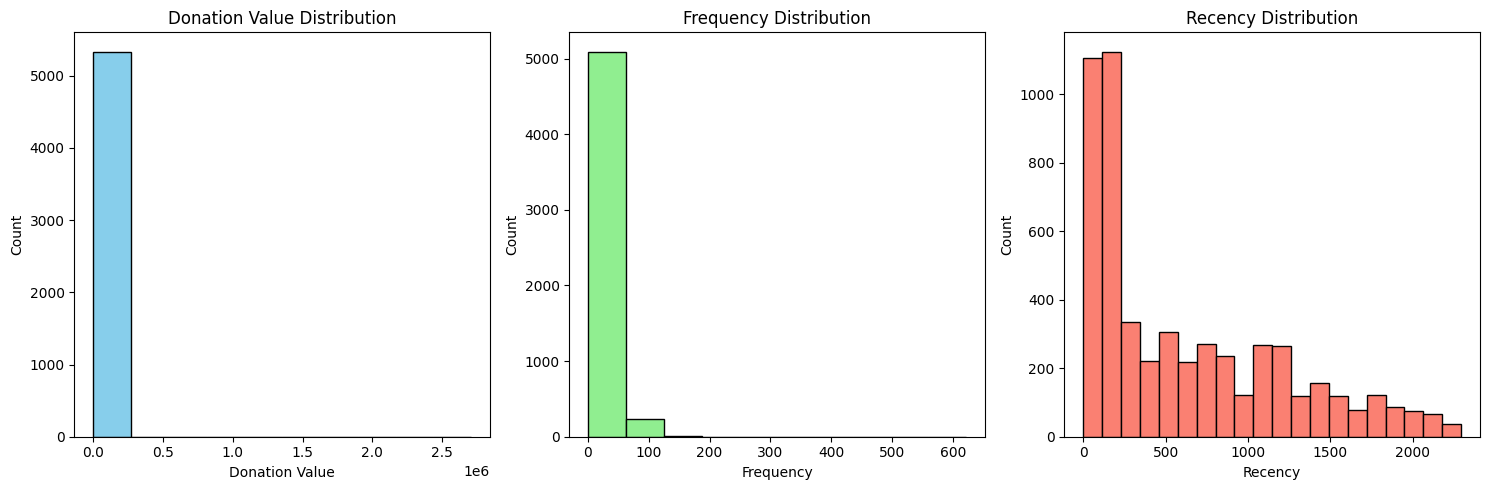

In [16]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(donor_features['sum_donations'], bins=10, color='skyblue', edgecolor='black')
plt.title('Donation Value Distribution')
plt.xlabel('Donation Value')
plt.ylabel('Count')

plt.subplot(1, 3, 2)
plt.hist(donor_features['count_donations'], bins=10, color='lightgreen', edgecolor='black')
plt.title('Frequency Distribution')
plt.xlabel('Frequency')
plt.ylabel('Count')

plt.subplot(1, 3, 3)
plt.hist(donor_features['recency'], bins=20, color='salmon', edgecolor='black')
plt.title('Recency Distribution')
plt.xlabel('Recency')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

### Observations

The dataset and charts shows significant variability across donors in terms of donation frequency, recency, and total donations. On average, donors have made approximately 12 donations, with 50% contributing 4 or fewer times, while a few outliers have donated as many as 621 times. The average time since the last donation is 613 days, with a wide range from very recent donors to those inactive for over 6 years. Total donation amounts are highly skewed, with an average of $1,911 but a median of just $250, indicating that most donors contribute relatively small amounts, while a few major donors significantly inflate the average (e.g., a maximum total donation of $2.7 million). These patterns highlight opportunities for segmentation, such as targeting low-frequency, high-recency donors for re-engagement and focusing retention efforts on loyal, high-frequency contributors.

## Checking boxplots for outliers

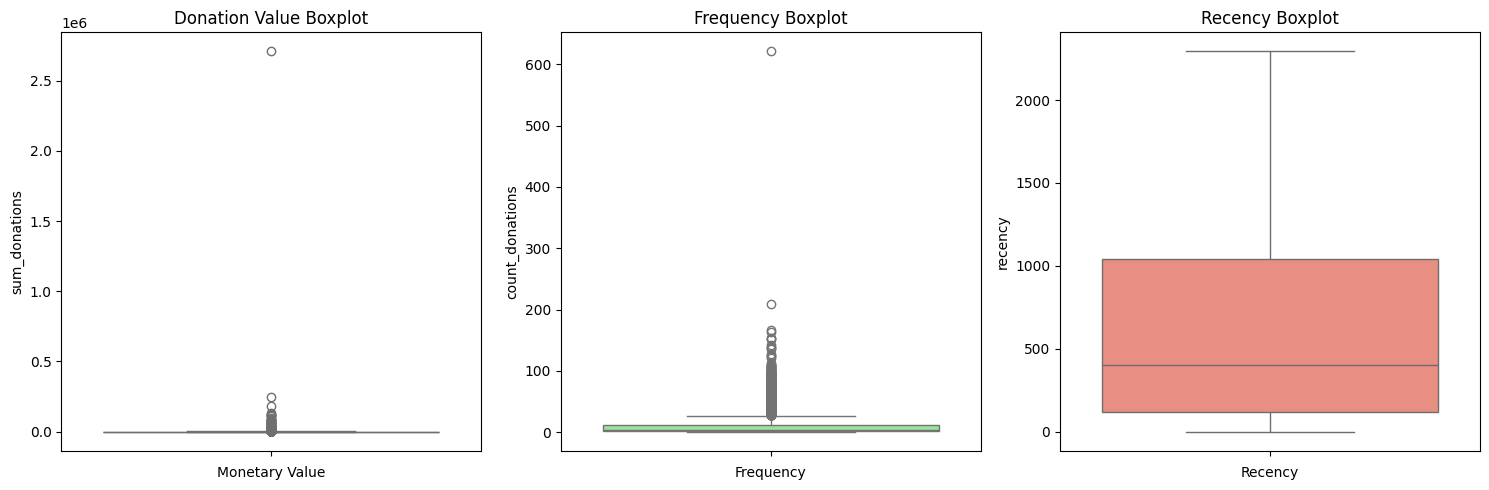

In [17]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(data=donor_features['sum_donations'], color='skyblue')
plt.title('Donation Value Boxplot')
plt.xlabel('Monetary Value')

plt.subplot(1, 3, 2)
sns.boxplot(data=donor_features['count_donations'], color='lightgreen')
plt.title('Frequency Boxplot')
plt.xlabel('Frequency')

plt.subplot(1, 3, 3)
sns.boxplot(data=donor_features['recency'], color='salmon')
plt.title('Recency Boxplot')
plt.xlabel('Recency')

plt.tight_layout()
plt.show()

In [18]:
M_Q1 = donor_features["sum_donations"].quantile(0.25)
M_Q3 = donor_features["sum_donations"].quantile(0.75)
M_IQR = M_Q3 - M_Q1

monetary_outliers_df = donor_features[(donor_features["sum_donations"] > (M_Q3 + 1.5 * M_IQR)) | (donor_features["sum_donations"] < (M_Q1 - 1.5 * M_IQR))].copy()

monetary_outliers_df.describe()

,first_donation_date,first_donation_amount,last_donation_date,last_donation_amount,count_donations,sum_donations,avg_donation,std_donation,min_donation,max_donation,...,unique_campaigns,campaign_x_pct,time_to_major_gift,yearly_donation_2018,yearly_donation_2019,yearly_donation_2020,yearly_donation_2021,yearly_donation_2022,yearly_donation_2023,yearly_donation_2024
count,569,569.000000,569,569.000000,569.000000,5.690000e+02,569.000000,562.000000,569.000000,569.000000,...,569.000000,569.0,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,5.690000e+02
mean,2019-04-13 17:35:19.507908608,1186.172232,2024-05-02 10:27:37.644991232,1500.026362,40.667838,1.451563e+04,1556.832782,1081.923209,683.611599,4032.942004,...,10.172232,0.0,134.203866,535.024605,1561.423550,1866.435852,2011.203866,2285.184534,2399.949033,3.856409e+03
min,2018-07-01 00:00:00,5.000000,2018-12-14 00:00:00,5.000000,1.000000,2.025000e+03,17.148760,0.000000,0.000000,20.000000,...,1.000000,0.0,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,2018-08-21 00:00:00,40.000000,2024-05-15 00:00:00,40.000000,11.000000,2.675000e+03,58.333333,31.029205,20.000000,200.000000,...,5.000000,0.0,-1.000000,0.000000,140.000000,300.000000,390.000000,350.000000,350.000000,2.000000e+02
50%,2018-11-27 00:00:00,100.000000,2024-08-12 00:00:00,100.000000,25.000000,3.770000e+03,168.780488,108.910241,35.000000,500.000000,...,9.000000,0.0,-1.000000,100.000000,445.000000,525.000000,650.000000,600.000000,600.000000,5.000000e+02
75%,2019-06-18 00:00:00,320.000000,2024-10-03 00:00:00,500.000000,70.000000,7.100000e+03,500.000000,311.388029,100.000000,1000.000000,...,15.000000,0.0,-1.000000,300.000000,910.000000,1000.000000,1200.000000,1193.000000,1200.000000,9.500000e+02
max,2024-10-17 00:00:00,180000.000000,2024-10-24 00:00:00,180000.000000,621.000000,2.708064e+06,225672.000000,231886.349909,180000.000000,770000.000000,...,39.000000,0.0,2177.000000,48369.000000,71298.000000,270000.000000,300000.000000,330000.000000,465000.000000,1.248000e+06
std,NaN,8531.306144,NaN,11156.710226,42.478541,1.150434e+05,12380.302783,10013.836152,7805.156158,33702.110798,...,6.779360,0.0,393.978820,2824.457855,5919.850454,11807.340698,12959.137052,14837.867360,19895.014126,5.294091e+04


In [19]:
F_Q1 = donor_features['count_donations'].quantile(0.25)
F_Q3 = donor_features['count_donations'].quantile(0.75)
F_IQR = F_Q3 - F_Q1

frequency_outliers_df = donor_features[(donor_features['count_donations'] > (F_Q3 + 1.5 * F_IQR)) | (donor_features['count_donations'] < (F_Q1 - 1.5 * F_IQR))].copy()

frequency_outliers_df.describe()

,first_donation_date,first_donation_amount,last_donation_date,last_donation_amount,count_donations,sum_donations,avg_donation,std_donation,min_donation,max_donation,...,unique_campaigns,campaign_x_pct,time_to_major_gift,yearly_donation_2018,yearly_donation_2019,yearly_donation_2020,yearly_donation_2021,yearly_donation_2022,yearly_donation_2023,yearly_donation_2024
count,568,568.000000,568,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,...,568.000000,568.0,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000
mean,2019-05-07 00:38:01.690140672,68.566901,2024-07-05 05:29:34.647887360,55.735915,60.658451,4109.489437,62.796276,78.501878,25.679577,499.544014,...,8.924296,0.0,42.153169,221.392606,595.191901,644.959507,686.274648,767.147887,690.195423,504.327465
min,2018-07-01 00:00:00,5.000000,2020-11-01 00:00:00,2.000000,28.000000,245.000000,7.800000,0.000000,0.000000,10.000000,...,1.000000,0.0,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2018-07-18 00:00:00,20.000000,2024-08-14 18:00:00,20.000000,38.000000,1213.750000,23.282468,5.566450,15.000000,50.000000,...,3.000000,0.0,-1.000000,0.000000,35.000000,150.000000,240.000000,240.000000,220.000000,118.750000
50%,2018-11-20 00:00:00,30.000000,2024-10-03 00:00:00,30.000000,57.000000,1832.500000,34.906083,14.921545,20.000000,100.000000,...,6.000000,0.0,-1.000000,50.000000,190.000000,300.000000,360.000000,340.000000,325.000000,237.500000
75%,2019-11-08 00:00:00,50.000000,2024-10-17 00:00:00,50.000000,76.000000,3299.250000,53.520833,39.320910,27.000000,222.250000,...,14.000000,0.0,-1.000000,160.000000,431.250000,525.000000,630.500000,600.000000,600.000000,500.000000
max,2023-09-18 00:00:00,2161.000000,2024-10-24 00:00:00,2000.000000,621.000000,245554.000000,1479.104478,6136.886421,200.000000,50000.000000,...,39.000000,0.0,2177.000000,32333.000000,65892.000000,31560.000000,26200.000000,67900.000000,31102.000000,30658.000000
std,NaN,154.413115,NaN,112.103854,34.463941,12500.355371,120.782019,351.338567,22.685943,2528.587846,...,7.731580,0.0,240.314659,1450.190164,3139.309771,1952.261623,1608.832716,3305.093607,1744.260694,1506.091889


In [20]:
non_outliers_df = donor_features[(~donor_features.index.isin(monetary_outliers_df.index)) & (~donor_features.index.isin(frequency_outliers_df.index))]

non_outliers_df.describe()

/Users/jamesmontoya/miniconda3/envs/non_profit/lib/python3.13/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,first_donation_date,first_donation_amount,last_donation_date,last_donation_amount,count_donations,sum_donations,avg_donation,std_donation,min_donation,max_donation,...,unique_campaigns,campaign_x_pct,time_to_major_gift,yearly_donation_2018,yearly_donation_2019,yearly_donation_2020,yearly_donation_2021,yearly_donation_2022,yearly_donation_2023,yearly_donation_2024
count,4459,4459.000000,4459,4459.000000,4459.000000,4459.000000,4459.000000,3328.000000,4459.000000,4459.000000,...,4459.000000,4459.0,4459.000000,4459.000000,4459.000000,4459.000000,4459.000000,4459.000000,4459.000000,4459.000000
mean,2020-11-04 23:59:40.623458048,73.701054,2022-11-23 06:05:14.868804864,80.565149,5.638260,349.296255,75.494197,35.424164,52.758915,113.709576,...,4.265979,0.0,0.132092,21.323391,54.352994,53.780220,64.869702,53.843463,55.418704,45.707782
min,2018-07-01 00:00:00,0.000000,2018-07-15 00:00:00,1.000000,1.000000,2.000000,1.666667,0.000000,0.000000,2.000000,...,1.000000,0.0,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2019-02-20 00:00:00,25.000000,2021-09-10 00:00:00,25.000000,1.000000,65.000000,28.798077,5.163978,20.000000,35.000000,...,1.000000,0.0,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2020-07-02 00:00:00,50.000000,2023-05-01 00:00:00,50.000000,3.000000,180.000000,50.000000,15.000000,30.000000,54.000000,...,3.000000,0.0,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2022-06-30 12:00:00,100.000000,2024-05-31 12:00:00,100.000000,8.000000,475.000000,85.000000,35.355339,50.000000,100.000000,...,6.000000,0.0,-1.000000,0.000000,60.000000,60.000000,90.000000,60.000000,60.000000,50.000000
max,2024-10-21 00:00:00,2000.000000,2024-10-25 00:00:00,2000.000000,27.000000,2020.000000,2000.000000,707.106781,2000.000000,2000.000000,...,25.000000,0.0,1670.000000,1225.000000,2020.000000,1120.000000,2000.000000,2000.000000,1500.000000,2000.000000
std,NaN,119.938365,NaN,129.863325,5.802908,413.075362,108.028299,65.960134,97.585894,161.618315,...,4.247041,0.0,41.049880,70.777214,123.320011,110.053391,123.842808,114.492740,112.659210,115.783232


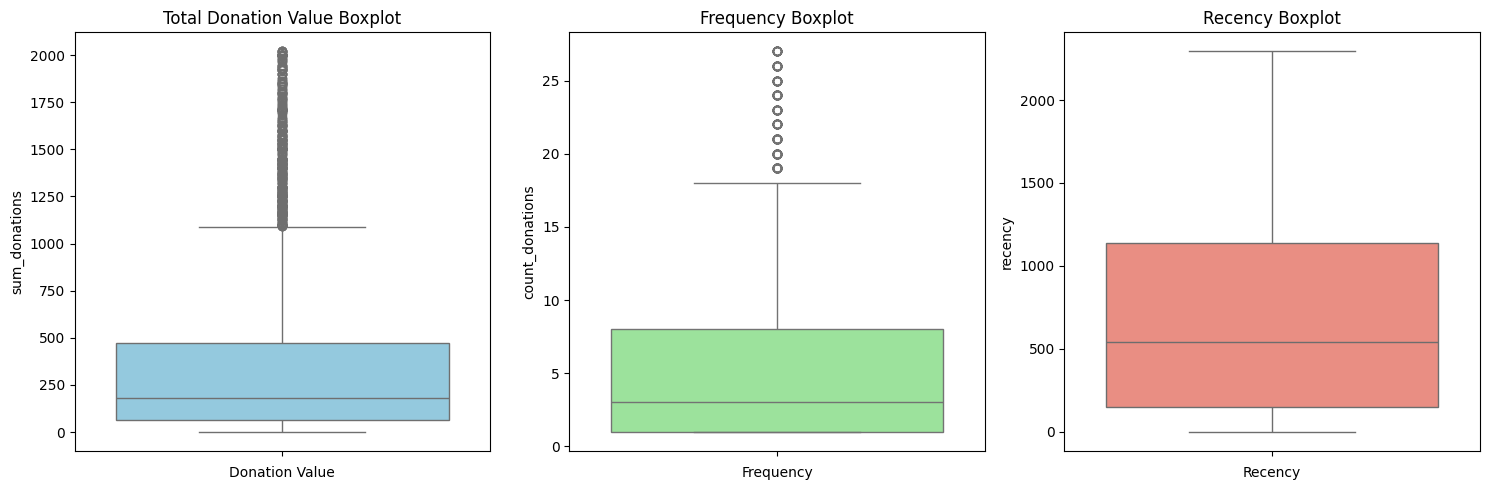

In [22]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(data=non_outliers_df['sum_donations'], color='skyblue')
plt.title('Total Donation Value Boxplot')
plt.xlabel('Donation Value')

plt.subplot(1, 3, 2)
sns.boxplot(data=non_outliers_df['count_donations'], color='lightgreen')
plt.title('Frequency Boxplot')
plt.xlabel('Frequency')

plt.subplot(1, 3, 3)
sns.boxplot(data=non_outliers_df['recency'], color='salmon')
plt.title('Recency Boxplot')
plt.xlabel('Recency')

plt.tight_layout()
plt.show()

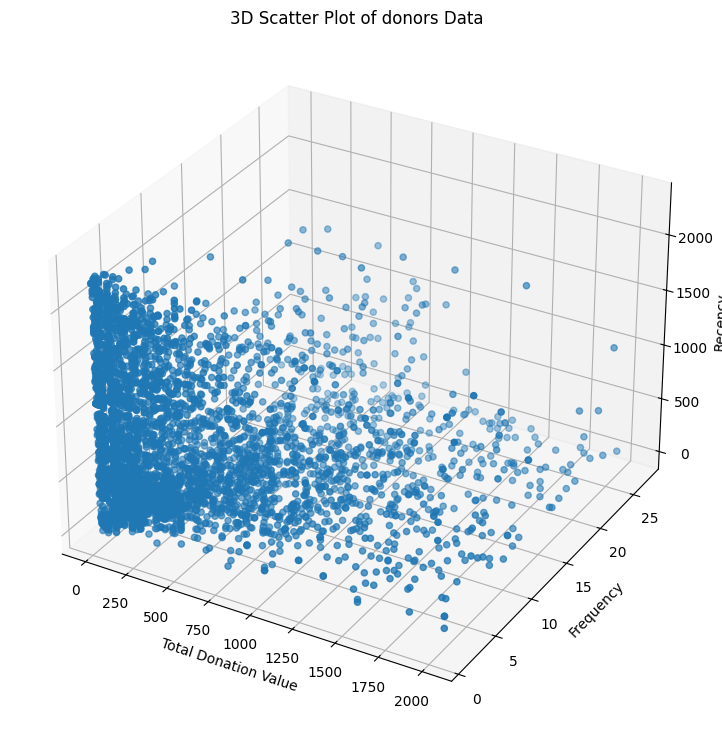

In [23]:
fig = plt.figure(figsize=(15, 9))

ax = fig.add_subplot(projection="3d")

scatter = ax.scatter(non_outliers_df["sum_donations"], non_outliers_df["count_donations"], non_outliers_df["recency"])

ax.set_xlabel('Total Donation Value')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')

ax.set_title('3D Scatter Plot of donors Data')

plt.show()

In [24]:
scaler = StandardScaler()

scaled_data = scaler.fit_transform(non_outliers_df[["sum_donations", "count_donations", "recency"]])

scaled_data

array([[-0.32514967, -0.28234871, -0.32080841],
       [-0.78516575, -0.79938891,  2.10165112],
       [ 0.84910191,  0.23469149, -0.8920651 ],
       ...,
       [-0.72463732, -0.79938891, -1.1122887 ],
       [ 1.04521402, -0.79938891, -1.07917237],
       [ 2.78601172, -0.62704217, -1.14540503]])

In [ ]:
scaled_data_df = pd.DataFrame(scaled_data, index=non_outliers_df.index, columns=("sum_donations", "count_donations", "recency"))

scaled_data_df

,sum_donations,count_donations,recency
5,-0.325150,-0.282349,-0.320808
6,-0.785166,-0.799389,2.101651
10,0.849102,0.234691,-0.892065
12,-0.700426,0.062345,-1.042744
13,-0.603580,-0.799389,-0.602297
...,...,...,...
5329,-0.748849,-0.799389,-1.108977
5330,-0.724637,-0.799389,-1.110633
5331,-0.724637,-0.799389,-1.112289
5332,1.045214,-0.799389,-1.079172


Checking the distribution after scale the data

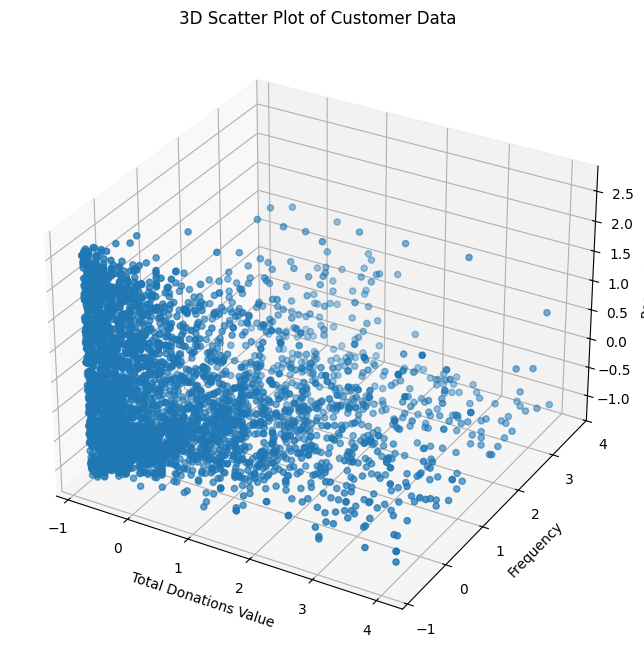

In [26]:
fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(projection="3d")

scatter = ax.scatter(scaled_data_df["sum_donations"], scaled_data_df["count_donations"], scaled_data_df["recency"])

ax.set_xlabel('Total Donations Value')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')

ax.set_title('3D Scatter Plot of Customer Data')

plt.show()

## KMeans Clustering

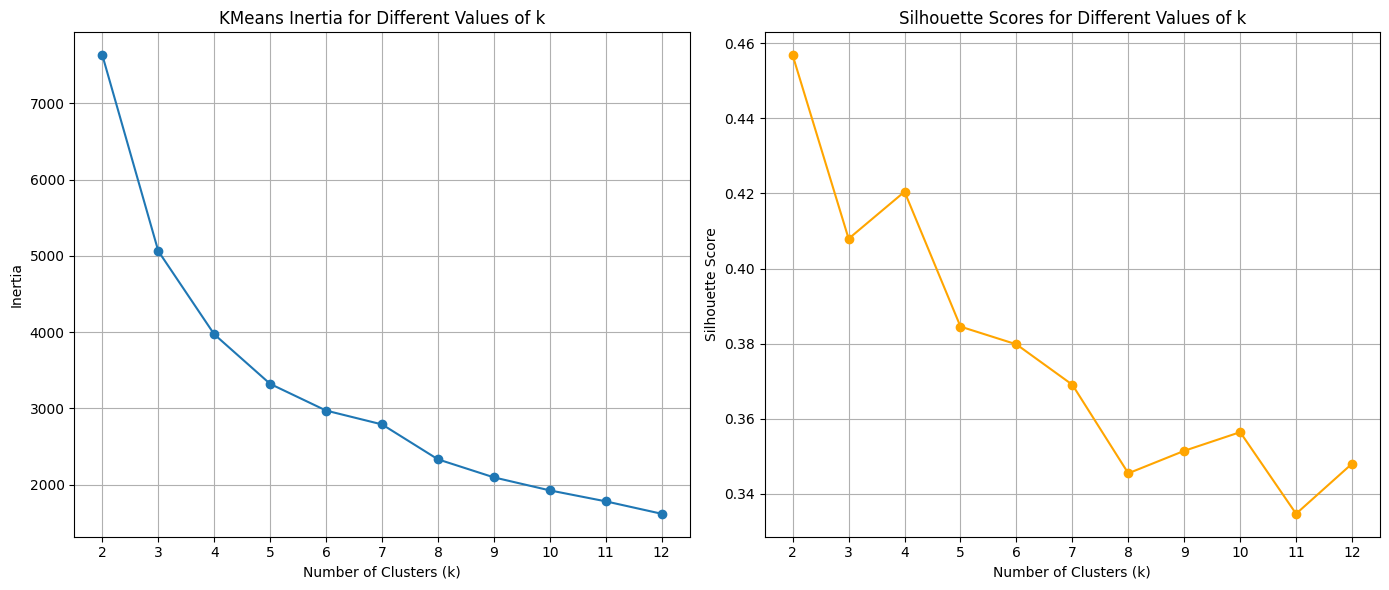

In [27]:

max_k = 12

inertia = []
silhoutte_scores = []
k_values = range(2, max_k + 1)

for k in k_values:

    kmeans = KMeans(n_clusters=k, random_state=42, max_iter=1000)

    cluster_labels = kmeans.fit_predict(scaled_data_df)

    sil_score = silhouette_score(scaled_data_df, cluster_labels)

    silhoutte_scores.append(sil_score)

    inertia.append(kmeans.inertia_)

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(k_values, inertia, marker='o')
plt.title('KMeans Inertia for Different Values of k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(k_values, silhoutte_scores, marker='o', color='orange')
plt.title('Silhouette Scores for Different Values of k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(k_values)
plt.grid(True)

plt.tight_layout()
plt.show()

The visualizations indicate that the optimal number of clusters for the dataset is 4, as identified through the elbow method and silhouette analysis. The elbow method shows a clear flattening of the inertia curve at k = 4, suggesting diminishing returns in variance reduction beyond this point. Similarly, the silhouette score peaks at k = 4, reflecting well-defined and cohesive clusters. These findings confirm that dividing the data into 4 clusters strikes the best balance between compactness and separation, making it the most suitable choice for clustering.

In [ ]:
#non_outliers_df = non_outliers_df.drop(columns=['Cluster']) this is for cecheking other number of clusters after run the first time

In [30]:
kmeans = KMeans(n_clusters=4, random_state=42, max_iter=1000)

cluster_labels = kmeans.fit_predict(scaled_data_df)

cluster_labels

array([0, 3, 0, ..., 0, 0, 2], dtype=int32)

In [31]:
non_outliers_df["Cluster"] = cluster_labels

non_outliers_df

/var/folders/l0/k640lr2x4_b2yl82b21lnhdm0000gn/T/ipykernel_30469/3577770544.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_outliers_df["Cluster"] = cluster_labels


,donor_id,first_donation_date,first_donation_amount,last_donation_date,last_donation_amount,count_donations,sum_donations,avg_donation,std_donation,min_donation,...,campaign_x_pct,time_to_major_gift,yearly_donation_2018,yearly_donation_2019,yearly_donation_2020,yearly_donation_2021,yearly_donation_2022,yearly_donation_2023,yearly_donation_2024,Cluster
5,007dummyid0006,2020-04-23,50.0,2023-06-05,50.0,4,215.0,53.75,14.930394,40.0,...,0.0,-1.0,0.0,0.0,50.0,75.0,40.0,50.0,0.0,0
6,007dummyid0007,2019-06-03,25.0,2019-06-03,25.0,1,25.0,25.00,NaN,25.0,...,0.0,-1.0,0.0,25.0,0.0,0.0,0.0,0.0,0.0,3
10,007dummyid0011,2018-11-07,200.0,2024-05-15,100.0,7,700.0,100.00,50.000000,50.0,...,0.0,-1.0,200.0,100.0,100.0,100.0,100.0,0.0,100.0,0
12,007dummyid0013,2018-09-26,10.0,2024-08-14,10.0,6,60.0,10.00,0.000000,10.0,...,0.0,-1.0,10.0,10.0,10.0,0.0,0.0,10.0,20.0,0
13,007dummyid0014,2023-11-22,100.0,2023-11-22,100.0,1,100.0,100.00,NaN,100.0,...,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5329,007dummyid5330,2024-09-23,40.0,2024-09-23,40.0,1,40.0,40.00,NaN,40.0,...,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,40.0,0
5330,007dummyid5331,2024-09-24,50.0,2024-09-24,50.0,1,50.0,50.00,NaN,50.0,...,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,50.0,0
5331,007dummyid5332,2024-09-25,50.0,2024-09-25,50.0,1,50.0,50.00,NaN,50.0,...,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,50.0,0
5332,007dummyid5333,2024-09-05,781.0,2024-09-05,781.0,1,781.0,781.00,NaN,781.0,...,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,781.0,0


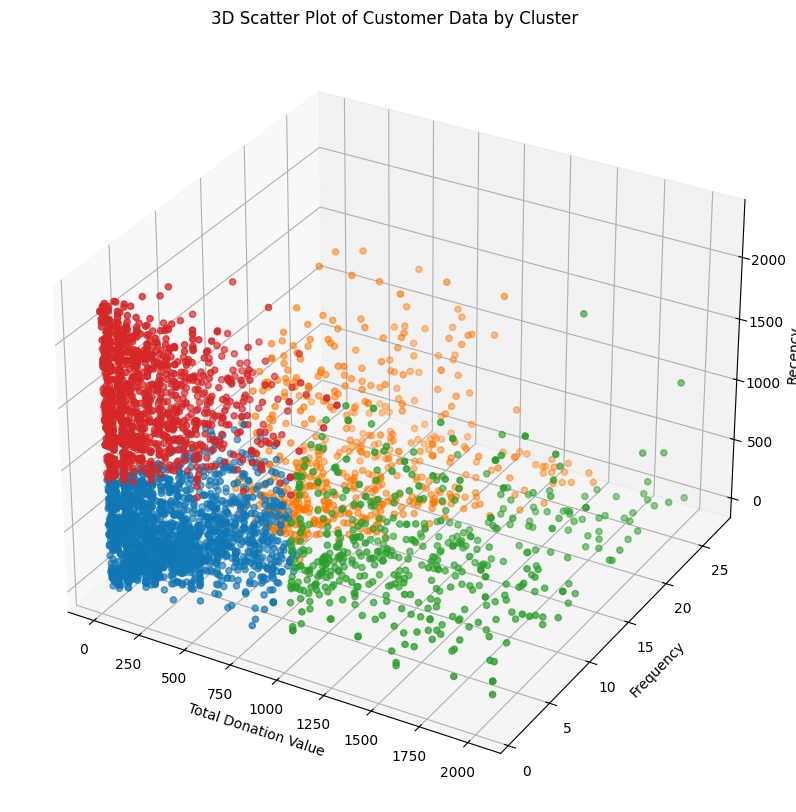

In [33]:
# Define cluster colors "sum_donations", "count_donations", "recency"
cluster_colors = {0: '#1177b4', 1: '#ff7700', 2: '#2ca02c', 3: '#d62728'}  # Add all necessary clusters

# Map colors to clusters and handle NaN
colors = non_outliers_df['Cluster'].map(cluster_colors).fillna('#808080').tolist()  # Default gray for NaN

# Create the 3D scatter plot
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')

scatter = ax.scatter(
    non_outliers_df['sum_donations'],  # X-axis
    non_outliers_df['count_donations'],       # Y-axis
    non_outliers_df['recency'],         # Z-axis
    c=colors,                           # Colors mapped from clusters
    marker='o'
)

# Set axis labels and title
ax.set_xlabel('Total Donation Value')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')
ax.set_title('3D Scatter Plot of Customer Data by Cluster')

plt.show()

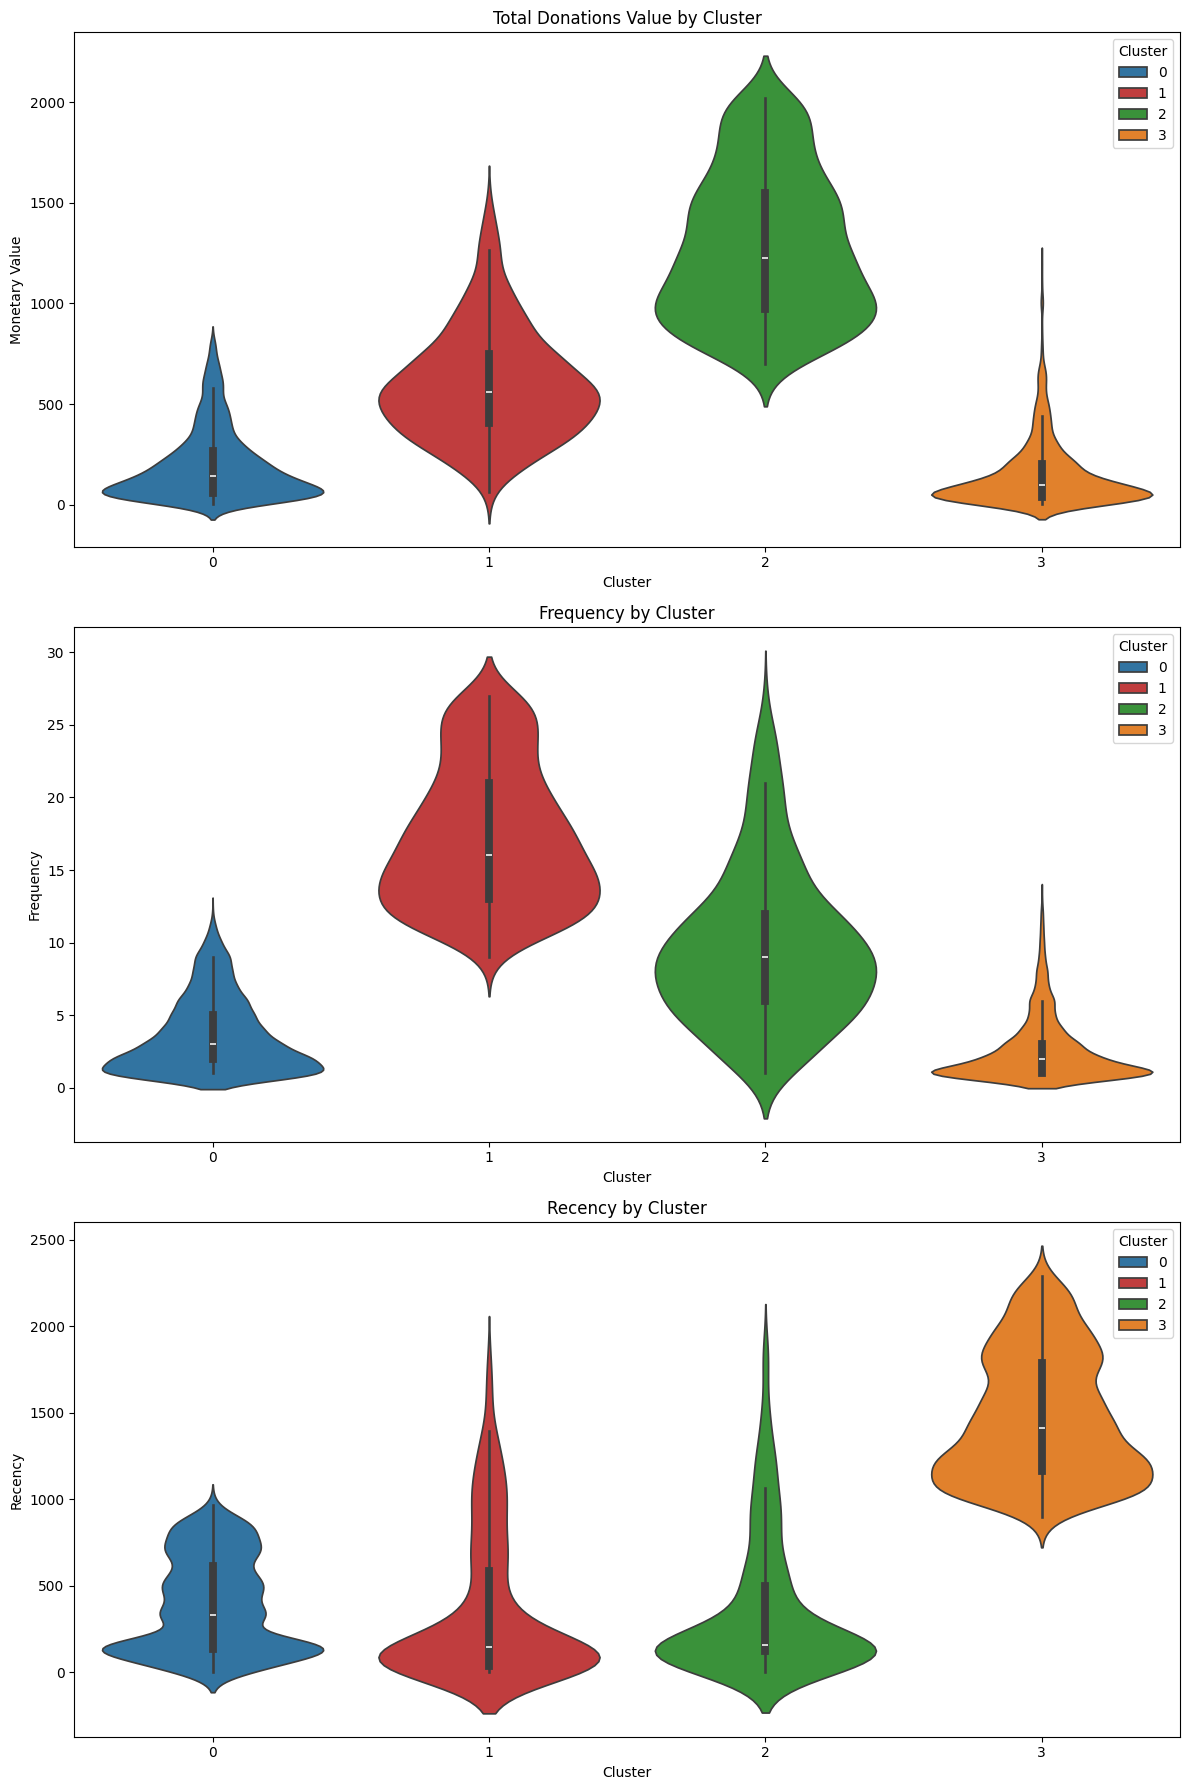

In [34]:
# Ensure cluster_colors includes all clusters
unique_clusters = non_outliers_df['Cluster'].unique()
cluster_colors = {cluster: color for cluster, color in zip(unique_clusters, sns.color_palette("tab10", len(unique_clusters)))}

# Plot
plt.figure(figsize=(12, 18))

# Plot 1: Total Donations Value by Cluster
plt.subplot(3, 1, 1)
sns.violinplot(x=non_outliers_df['Cluster'], y=non_outliers_df['sum_donations'], palette=cluster_colors, hue=non_outliers_df["Cluster"])
plt.title('Total Donations Value by Cluster')
plt.ylabel('Monetary Value')

# Plot 2: Frequency by Cluster
plt.subplot(3, 1, 2)
sns.violinplot(x=non_outliers_df['Cluster'], y=non_outliers_df['count_donations'], palette=cluster_colors, hue=non_outliers_df["Cluster"])
plt.title('Frequency by Cluster')
plt.ylabel('Frequency')

# Plot 3: Recency by Cluster
plt.subplot(3, 1, 3)
sns.violinplot(x=non_outliers_df['Cluster'], y=non_outliers_df['recency'], palette=cluster_colors, hue=non_outliers_df["Cluster"])
plt.title('Recency by Cluster')
plt.ylabel('Recency')

plt.tight_layout()
plt.show()

## Interpretation of the results

1.  Cluster 0 (Blue): "Retain" 
*    Rationale: This cluster represents the least active and lowest-value donors with low donations and frequency and recency. These donors may be new or need nurturing to increase their engagement and giving.
*   Action: Focus on building relationships, providing excellent customer service, and give more information to encourage more frequen donations.

2.  Cluster 1 (Red): "Nurture"
*   Rationale: This cluster includes regular donors, very frequent donors, many of whom are still actively donating. They are engaged donors, and nurture their loyalty is key to maintaining their engagement.
*   Action: Implement a news letter to provide information about the result of projects they support, and recognize their support to keep them engaged and satisfied.


3.  Cluster 2 (Green): "Reward"
*   Rationale: This cluster includes high-value, very frequent donors, many of whom are still actively donating. They are your most loyal donors, and rewarding their loyalty is key to maintaining their engagement.
*   Action: Implement a robust loyalty program, provide exclusive events, and recognize their loyalty to keep them engaged and satisfied.


4.  Cluster 3 (Orange): "Re-Engage"
*   Rationale: This group includes lower-value, infrequent donors who haven’t donated recently. The focus should be on re-engagement to bring them back into active donor behavior.
*   Action: Use targeted marketing campaigns, special projects, or reminders to encourage them to return and donate again.

## Summary of Cluster Names:

* Cluster 0 (Blue): "Retain"
* Cluster 1 (Red): "Nurture"
* Cluster 2 (Green): "Reward"
* Cluster 3 (Orange): "Re-Engage" 


In [35]:
overlap_indices = monetary_outliers_df.index.intersection(frequency_outliers_df.index)

monetary_only_outliers = monetary_outliers_df.drop(overlap_indices)
frequency_only_outliers = frequency_outliers_df.drop(overlap_indices)
monetary_and_frequency_outliers = monetary_outliers_df.loc[overlap_indices]

monetary_only_outliers["Cluster"] = -1
frequency_only_outliers["Cluster"] = -2
monetary_and_frequency_outliers["Cluster"] = -3

outlier_clusters_df = pd.concat([monetary_only_outliers, frequency_only_outliers, monetary_and_frequency_outliers])

outlier_clusters_df

,donor_id,first_donation_date,first_donation_amount,last_donation_date,last_donation_amount,count_donations,sum_donations,avg_donation,std_donation,min_donation,...,campaign_x_pct,time_to_major_gift,yearly_donation_2018,yearly_donation_2019,yearly_donation_2020,yearly_donation_2021,yearly_donation_2022,yearly_donation_2023,yearly_donation_2024,Cluster
1,007dummyid0002,2018-09-24,200.0,2024-08-27,500.0,17,3950.0,232.352941,108.888097,100.0,...,0.0,-1.0,200.0,450.0,600.0,500.0,600.0,950.0,650.0,-1
2,007dummyid0003,2018-12-05,600.0,2024-03-23,750.0,12,7500.0,625.000000,143.811746,400.0,...,0.0,-1.0,600.0,1000.0,900.0,1250.0,1500.0,1500.0,750.0,-1
9,007dummyid0010,2018-11-15,1000.0,2024-05-20,2000.0,12,21000.0,1750.000000,452.267017,1000.0,...,0.0,376.0,1000.0,3000.0,3000.0,4000.0,4000.0,4000.0,2000.0,-1
25,007dummyid0026,2020-01-08,1000.0,2020-06-25,1000.0,3,3000.0,1000.000000,0.000000,1000.0,...,0.0,-1.0,0.0,0.0,3000.0,0.0,0.0,0.0,0.0,-1
31,007dummyid0032,2018-09-24,100.0,2024-05-16,150.0,21,2430.0,115.714286,31.396087,50.0,...,0.0,-1.0,300.0,400.0,390.0,420.0,300.0,350.0,270.0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5032,007dummyid5033,2018-07-01,50.0,2024-10-03,120.0,82,6170.0,75.243902,43.382468,40.0,...,0.0,-1.0,300.0,700.0,600.0,600.0,900.0,1690.0,1380.0,-3
5034,007dummyid5035,2018-12-11,200.0,2024-10-17,30.0,28,2335.0,83.392857,65.462084,30.0,...,0.0,-1.0,200.0,300.0,255.0,200.0,450.0,530.0,400.0,-3
5035,007dummyid5036,2018-07-01,20.0,2024-10-03,20.0,96,2315.0,24.114583,8.303290,20.0,...,0.0,-1.0,80.0,380.0,315.0,360.0,345.0,505.0,330.0,-3
5058,007dummyid5059,2018-07-01,220.0,2024-10-03,30.0,79,2940.0,37.215190,38.661473,10.0,...,0.0,-1.0,330.0,240.0,520.0,510.0,300.0,410.0,630.0,-3


## Outliers segmentation

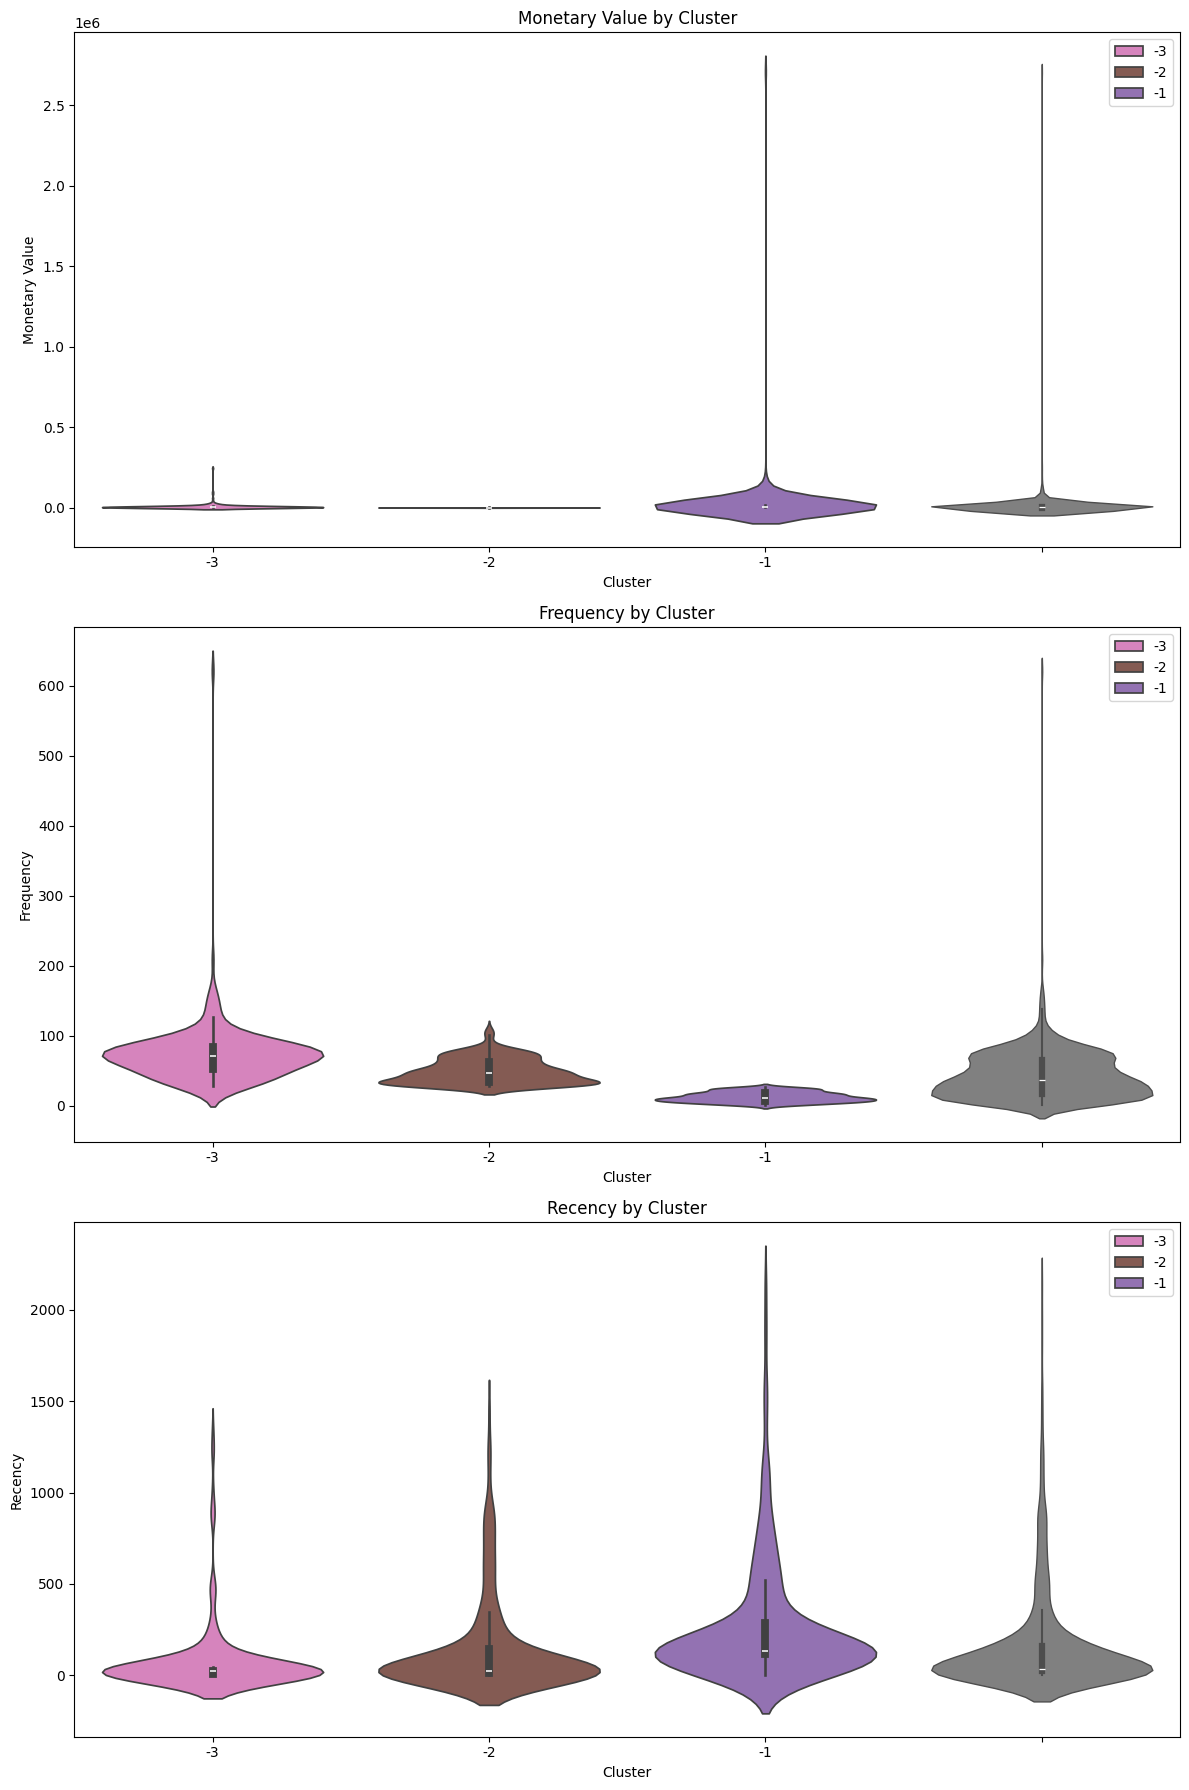

In [ ]:
cluster_colors = {-1: '#9467bd',
                  -2: '#8c564b',
                  -3: '#e377c2'}

#"sum_donations", "count_donations", "recency"

plt.figure(figsize=(12, 18))

plt.subplot(3, 1, 1)
sns.violinplot(x=outlier_clusters_df['Cluster'], y=outlier_clusters_df['sum_donations'], palette=cluster_colors, hue=outlier_clusters_df["Cluster"])
sns.violinplot(y=outlier_clusters_df['sum_donations'], color='gray', linewidth=1.0)
plt.title('Monetary Value by Cluster')
plt.ylabel('Monetary Value')

plt.subplot(3, 1, 2)
sns.violinplot(x=outlier_clusters_df['Cluster'], y=outlier_clusters_df['count_donations'], palette=cluster_colors, hue=outlier_clusters_df["Cluster"])
sns.violinplot(y=outlier_clusters_df['count_donations'], color='gray', linewidth=1.0)
plt.title('Frequency by Cluster')
plt.ylabel('Frequency')

plt.subplot(3, 1, 3)
sns.violinplot(x=outlier_clusters_df['Cluster'], y=outlier_clusters_df['recency'], palette=cluster_colors, hue=outlier_clusters_df["Cluster"])
sns.violinplot(y=outlier_clusters_df['recency'], color='gray', linewidth=1.0)
plt.title('Recency by Cluster')
plt.ylabel('Recency')

plt.tight_layout()
plt.show()

# Interpretation of Donor Clusters

### **Cluster -3 (Monetary & Frequency Outliers) – DELIGHT**
**Characteristics:**
- These donors exhibit extreme values in both monetary contributions and donation frequency. They are highly engaged and make significant contributions regularly.
- The monetary value and frequency distributions indicate these donors are the most valuable and consistent supporters.

**Potential Strategy:**
- Treat these donors as VIPs and provide them with exclusive attention and personalized communication.
- Organize special events or recognition programs to make them feel valued.
- Share detailed updates and success stories to reinforce their commitment and show the impact of their contributions.

---

### **Cluster -2 (Frequency Outliers) – UPSELL**
**Characteristics:**
- These donors contribute frequently but with smaller amounts per donation. Their engagement level is high, but their monetary contributions are modest.
- Frequency plots reveal consistent engagement, while monetary values remain comparatively low.

**Potential Strategy:**
- Implement loyalty or rewards programs to incentivize consistent donations, such as recognition tiers or badges.
- Encourage larger donations by demonstrating the amplified impact of higher contributions through bundled campaigns.
- Promote recurring donation programs to ensure continued engagement and lock in their frequency as a subscription-like model.

---

### **Cluster -1 (Monetary Outliers) – PAMPER**
**Characteristics:**
- High spenders who donate infrequently. Their contributions are substantial but sporadic.
- The monetary value plot shows significant peaks, while frequency is minimal.

**Potential Strategy:**
- Focus on re-engagement strategies to encourage more frequent donations, such as personalized offers or exclusive campaigns.
- Use emotional storytelling to highlight the impact of their contributions and create a stronger connection to the cause.
- Reach out with high-impact projects or matching fund campaigns tailored to their capacity for significant giving.

---

### **Summary of Strategies**
1. **DELIGHT (Cluster -3):** Nurture loyalty and exclusivity through VIP experiences and direct communication.
2. **UPSELL (Cluster -2):** Encourage higher spending per donation with loyalty rewards and impactful messaging.
3. **PAMPER (Cluster -1):** Re-engage high spenders with infrequent but targeted campaigns that create an emotional connection.

This segmentation provides tailored strategies to maximize engagement and long-term contribution potential from each donor type.

In [37]:
cluster_labels = {
    0: "RETAIN",
    3: "RE-ENGAGE",
    1: "NURTURE",
    2: "REWARD",
    -1: "PAMPER",
    -2: "UPSELL",
    -3: "DELIGHT"
}

In [38]:
full_clustering_df = pd.concat([non_outliers_df, outlier_clusters_df])

full_clustering_df

,donor_id,first_donation_date,first_donation_amount,last_donation_date,last_donation_amount,count_donations,sum_donations,avg_donation,std_donation,min_donation,...,campaign_x_pct,time_to_major_gift,yearly_donation_2018,yearly_donation_2019,yearly_donation_2020,yearly_donation_2021,yearly_donation_2022,yearly_donation_2023,yearly_donation_2024,Cluster
5,007dummyid0006,2020-04-23,50.0,2023-06-05,50.0,4,215.0,53.750000,14.930394,40.0,...,0.0,-1.0,0.0,0.0,50.0,75.0,40.0,50.0,0.0,0
6,007dummyid0007,2019-06-03,25.0,2019-06-03,25.0,1,25.0,25.000000,NaN,25.0,...,0.0,-1.0,0.0,25.0,0.0,0.0,0.0,0.0,0.0,3
10,007dummyid0011,2018-11-07,200.0,2024-05-15,100.0,7,700.0,100.000000,50.000000,50.0,...,0.0,-1.0,200.0,100.0,100.0,100.0,100.0,0.0,100.0,0
12,007dummyid0013,2018-09-26,10.0,2024-08-14,10.0,6,60.0,10.000000,0.000000,10.0,...,0.0,-1.0,10.0,10.0,10.0,0.0,0.0,10.0,20.0,0
13,007dummyid0014,2023-11-22,100.0,2023-11-22,100.0,1,100.0,100.000000,NaN,100.0,...,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5032,007dummyid5033,2018-07-01,50.0,2024-10-03,120.0,82,6170.0,75.243902,43.382468,40.0,...,0.0,-1.0,300.0,700.0,600.0,600.0,900.0,1690.0,1380.0,-3
5034,007dummyid5035,2018-12-11,200.0,2024-10-17,30.0,28,2335.0,83.392857,65.462084,30.0,...,0.0,-1.0,200.0,300.0,255.0,200.0,450.0,530.0,400.0,-3
5035,007dummyid5036,2018-07-01,20.0,2024-10-03,20.0,96,2315.0,24.114583,8.303290,20.0,...,0.0,-1.0,80.0,380.0,315.0,360.0,345.0,505.0,330.0,-3
5058,007dummyid5059,2018-07-01,220.0,2024-10-03,30.0,79,2940.0,37.215190,38.661473,10.0,...,0.0,-1.0,330.0,240.0,520.0,510.0,300.0,410.0,630.0,-3


In [39]:
full_clustering_df["ClusterLabel"] = full_clustering_df["Cluster"].map(cluster_labels)

full_clustering_df

,donor_id,first_donation_date,first_donation_amount,last_donation_date,last_donation_amount,count_donations,sum_donations,avg_donation,std_donation,min_donation,...,time_to_major_gift,yearly_donation_2018,yearly_donation_2019,yearly_donation_2020,yearly_donation_2021,yearly_donation_2022,yearly_donation_2023,yearly_donation_2024,Cluster,ClusterLabel
5,007dummyid0006,2020-04-23,50.0,2023-06-05,50.0,4,215.0,53.750000,14.930394,40.0,...,-1.0,0.0,0.0,50.0,75.0,40.0,50.0,0.0,0,RETAIN
6,007dummyid0007,2019-06-03,25.0,2019-06-03,25.0,1,25.0,25.000000,NaN,25.0,...,-1.0,0.0,25.0,0.0,0.0,0.0,0.0,0.0,3,RE-ENGAGE
10,007dummyid0011,2018-11-07,200.0,2024-05-15,100.0,7,700.0,100.000000,50.000000,50.0,...,-1.0,200.0,100.0,100.0,100.0,100.0,0.0,100.0,0,RETAIN
12,007dummyid0013,2018-09-26,10.0,2024-08-14,10.0,6,60.0,10.000000,0.000000,10.0,...,-1.0,10.0,10.0,10.0,0.0,0.0,10.0,20.0,0,RETAIN
13,007dummyid0014,2023-11-22,100.0,2023-11-22,100.0,1,100.0,100.000000,NaN,100.0,...,-1.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0,RETAIN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5032,007dummyid5033,2018-07-01,50.0,2024-10-03,120.0,82,6170.0,75.243902,43.382468,40.0,...,-1.0,300.0,700.0,600.0,600.0,900.0,1690.0,1380.0,-3,DELIGHT
5034,007dummyid5035,2018-12-11,200.0,2024-10-17,30.0,28,2335.0,83.392857,65.462084,30.0,...,-1.0,200.0,300.0,255.0,200.0,450.0,530.0,400.0,-3,DELIGHT
5035,007dummyid5036,2018-07-01,20.0,2024-10-03,20.0,96,2315.0,24.114583,8.303290,20.0,...,-1.0,80.0,380.0,315.0,360.0,345.0,505.0,330.0,-3,DELIGHT
5058,007dummyid5059,2018-07-01,220.0,2024-10-03,30.0,79,2940.0,37.215190,38.661473,10.0,...,-1.0,330.0,240.0,520.0,510.0,300.0,410.0,630.0,-3,DELIGHT


## Final Chart

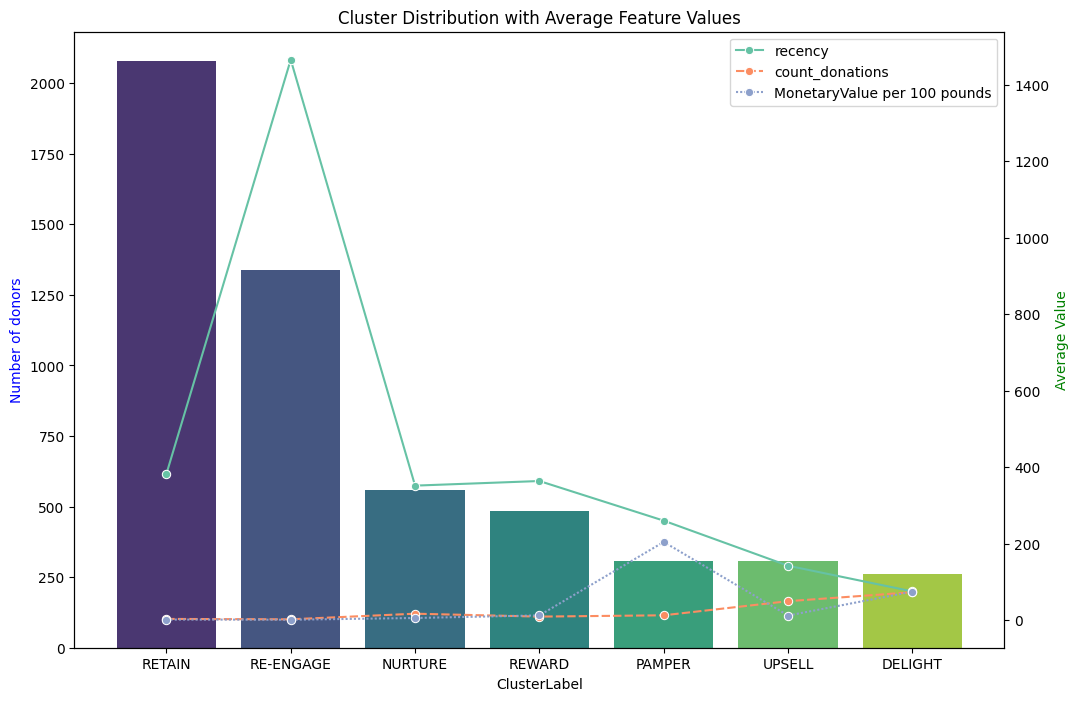

In [40]:

#"sum_donations", "count_donations", "recency"
cluster_counts = full_clustering_df['ClusterLabel'].value_counts()
full_clustering_df["MonetaryValue per 100 pounds"] = full_clustering_df["sum_donations"] / 100.00
feature_means = full_clustering_df.groupby('ClusterLabel')[['recency', 'count_donations', 'MonetaryValue per 100 pounds']].mean()

fig, ax1 = plt.subplots(figsize=(12, 8))

sns.barplot(x=cluster_counts.index, y=cluster_counts.values, ax=ax1, palette='viridis', hue=cluster_counts.index)
ax1.set_ylabel('Number of donors', color='b')
ax1.set_title('Cluster Distribution with Average Feature Values')

ax2 = ax1.twinx()

sns.lineplot(data=feature_means, ax=ax2, palette='Set2', marker='o')
ax2.set_ylabel('Average Value', color='g')

plt.show()